# ENGLISH PREMIER LEAGUE 2021-2022 ANALYSIS 

In this notebook, I will be analyzing the 2021-22 Premier League that crowned Manchester City for the 3rd time in 4 years. The run for the title has been once again epic between ManCity and Liverpool.  

The dataset is from Kaggle and gathers the 380 games that took place during the season. We have a couple of information on each game on the home and away team, goals scored, shots taken, shots on target, corners, cards...

First of all, my analysis will focus on the rivalry between ManCity and Liverpool, the 2 best teams in the league for the last 4 years. Then, I will look at the impact of leading at HalfTime.  

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('soccer21-22.csv')

## English Premier League overall

In [3]:
df.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,13/08/2021,Brentford,Arsenal,2,0,H,1,0,H,M Oliver,...,3,4,12,8,2,5,0,0,0,0
1,14/08/2021,Man United,Leeds,5,1,H,1,0,H,P Tierney,...,8,3,11,9,5,4,1,2,0,0
2,14/08/2021,Burnley,Brighton,1,2,A,1,0,H,D Coote,...,3,8,10,7,7,6,2,1,0,0
3,14/08/2021,Chelsea,Crystal Palace,3,0,H,2,0,H,J Moss,...,6,1,15,11,5,2,0,0,0,0
4,14/08/2021,Everton,Southampton,3,1,H,0,1,A,A Madley,...,6,3,13,15,6,8,2,0,0,0


In [4]:
df.columns

Index(['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG',
       'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC',
       'HY', 'AY', 'HR', 'AR'],
      dtype='object')

In [5]:
df.shape

(380, 22)

In [6]:
print(len(df['HomeTeam'].unique()))
print(len(df['AwayTeam'].unique()))

20
20


In [7]:
print('Number of games: ',len(df))
print('Number of goals scored: ',df['FTHG'].sum() + df['FTAG'].sum())


Number of games:  380
Number of goals scored:  1071


In [8]:
df['Hwin'] = np.where(df['FTHG'] > df['FTAG'],1,0)
df['Awin'] = np.where(df['FTHG'] < df['FTAG'],1,0)
df['count'] = 1

In [9]:
home_stats = df.groupby('HomeTeam')['Hwin','FTHG','FTAG','HTHG','HS', 'HST','AST','HF', 'HC', 'HY', 'HR'].sum().reset_index()

/tmp/ipykernel_265/3353083858.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  home_stats = df.groupby('HomeTeam')['Hwin','FTHG','FTAG','HTHG','HS', 'HST','AST','HF', 'HC', 'HY', 'HR'].sum().reset_index()


In [10]:
away_stats = df.groupby('AwayTeam')['Awin','FTAG','FTHG','HTAG','AS', 'AST','HST','AF', 'AC', 'AY', 'AR'].sum().reset_index()

/tmp/ipykernel_265/4012228336.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  away_stats = df.groupby('AwayTeam')['Awin','FTAG','FTHG','HTAG','AS', 'AST','HST','AF', 'AC', 'AY', 'AR'].sum().reset_index()


In [11]:
home_stats.rename(columns={'HomeTeam':'Team','FTAG':'HG_Conceded','AST':'HST_Conceded'}, inplace=True)
away_stats.rename(columns={'AwayTeam':'Team', 'FTHG':'AG_Conceded', 'HST':'AST_Conceded'}, inplace=True)


In [12]:
# We create a dataset that gathers all the stats for each team
team_stats = pd.merge(home_stats, away_stats, on='Team')

In [13]:
team_stats

,Team,Hwin,FTHG,HG_Conceded,HTHG,HS,HST,HST_Conceded,HF,HC,...,FTAG,AG_Conceded,HTAG,AS,AST,AST_Conceded,AF,AC,AY,AR
0,Arsenal,13,35,17,16,347,116,58,179,127,...,26,31,17,241,81,89,184,82,29,3
1,Aston Villa,6,29,29,12,235,86,80,190,90,...,23,25,9,219,76,77,211,106,46,0
2,Brentford,7,22,21,6,233,77,72,187,88,...,26,35,10,209,77,111,184,71,32,1
3,Brighton,5,19,23,9,280,67,81,208,118,...,23,21,7,210,85,71,185,84,39,1
4,Burnley,5,18,25,9,229,73,88,201,102,...,16,28,8,178,52,99,193,82,34,2
5,Chelsea,9,37,22,16,326,115,63,213,138,...,39,11,18,266,96,56,196,104,31,1
6,Crystal Palace,7,27,17,11,231,81,63,210,91,...,23,29,10,181,66,83,205,85,33,1
7,Everton,9,27,25,8,227,76,82,167,93,...,16,41,8,211,62,108,201,68,35,1
8,Leeds,4,19,38,8,264,75,108,236,96,...,23,41,8,221,79,123,233,75,47,1
9,Leicester,10,34,23,14,237,94,89,168,93,...,28,36,13,198,75,108,188,92,32,1


In [14]:
team_stats['Goals_Scored'] = team_stats['FTHG'] + team_stats['FTAG'] # Total Goals Scored
team_stats['Total_wins'] = team_stats['Hwin'] + team_stats['Awin'] # Total wins
team_stats['Total_shots'] = team_stats['HS'] + team_stats['AS'] # Total shots attempted
team_stats['Shots_on_target'] = team_stats['HST'] + team_stats['AST'] # Total shots on target
team_stats['Goals_Conceded'] = team_stats['HG_Conceded'] + team_stats['AG_Conceded'] # Total Goals conceded
team_stats['ST_Conceded'] = team_stats['HST_Conceded'] + team_stats['AST_Conceded'] # Total shots conceded

In [15]:
team_stats.head()

,Team,Hwin,FTHG,HG_Conceded,HTHG,HS,HST,HST_Conceded,HF,HC,...,AF,AC,AY,AR,Goals_Scored,Total_wins,Total_shots,Shots_on_target,Goals_Conceded,ST_Conceded
0,Arsenal,13,35,17,16,347,116,58,179,127,...,184,82,29,3,61,22,588,197,48,147
1,Aston Villa,6,29,29,12,235,86,80,190,90,...,211,106,46,0,52,13,454,162,54,157
2,Brentford,7,22,21,6,233,77,72,187,88,...,184,71,32,1,48,13,442,154,56,183
3,Brighton,5,19,23,9,280,67,81,208,118,...,185,84,39,1,42,12,490,152,44,152
4,Burnley,5,18,25,9,229,73,88,201,102,...,193,82,34,2,34,7,407,125,53,187


We would like to see the ranking's evolution during the season.

In [16]:
teams = list(df['HomeTeam'].unique()) # list of the 20 teams
game_list = []


for pl_team in teams:
    home = df[df['HomeTeam'] == pl_team][['Date','HomeTeam','FTR']] # Home Games for one team
    away = df[df['AwayTeam'] == pl_team][['Date','AwayTeam','FTR']] # Away Games for one team

    home.rename(columns={'HomeTeam':'Team'}, inplace=True)
    away.rename(columns={'AwayTeam':'Team'}, inplace=True)
    
    home['points'] = np.where(home['FTR'] == 'H', 3, np.where(home['FTR'] == 'A',0,1)) 
    away['points'] = np.where(away['FTR'] == 'A', 3, np.where(away['FTR'] == 'H',0,1))
    # Points given according to the result
    
    game = pd.concat([home,away])
    game['Date'] = pd.to_datetime(game['Date'], infer_datetime_format=True)
    game.sort_values(by='Date', inplace=True) # Games sorted by date from Day 1 to Day 38
    
    game['cum_points'] = game['points'].cumsum() # We cumulate the points won after each day. 
    
    game_list.append(game)
    

In [17]:
team_cum_pts = pd.concat(game_list) # Games played by each team with the points taken on the given game

In [18]:
team_cum_pts['Day'] = [i for i in range(1,39)]*20
# Colonne Day created for the 38 Premier League Games

In [19]:
team_cum_pts

,Date,Team,FTR,points,cum_points,Day
0,2021-08-13,Brentford,H,3,3,1
12,2021-08-21,Brentford,D,1,4,2
21,2021-08-28,Brentford,D,1,5,3
32,2021-09-11,Brentford,A,0,5,4
41,2021-09-18,Brentford,A,3,8,5
...,...,...,...,...,...,...
328,2022-04-24,West Ham,H,0,52,34
340,2022-05-01,West Ham,A,0,52,35
350,2022-05-08,West Ham,A,3,55,36
362,2022-05-15,West Ham,D,1,56,37


In [20]:
team_cum_pts_table = team_cum_pts.pivot_table(columns='Day', values = 'cum_points', index = 'Team')

In [21]:
team_cum_pts_table

Day,1,2,3,4,5,6,7,8,9,10,...,29,30,31,32,33,34,35,36,37,38
Team,,,,,,,,,,,,,,,,,,,,,
Arsenal,0,0,0,3,6,9,10,11,14,17,...,54,54,54,57,60,63,66,66,66,69
Aston Villa,0,3,4,4,7,10,10,10,10,10,...,36,36,36,37,40,43,43,44,45,45
Brentford,3,4,5,5,8,9,12,12,12,12,...,30,30,33,36,39,40,40,43,46,46
Brighton,3,6,6,9,12,13,14,15,15,16,...,33,34,37,40,40,41,44,47,48,51
Burnley,0,0,1,1,1,2,3,3,4,7,...,24,24,25,28,31,34,34,34,35,35
Chelsea,3,6,7,10,13,13,16,19,22,25,...,59,62,62,65,66,66,67,70,71,74
Crystal Palace,0,1,2,5,5,6,7,8,9,12,...,34,37,37,37,38,41,44,45,45,48
Everton,3,4,7,10,10,13,14,14,14,14,...,25,28,29,29,32,35,36,36,39,39
Leeds,0,1,2,2,3,3,6,6,7,10,...,26,29,30,33,34,34,34,34,35,38


In [22]:
team_cum_pts_table = team_cum_pts_table.reset_index()

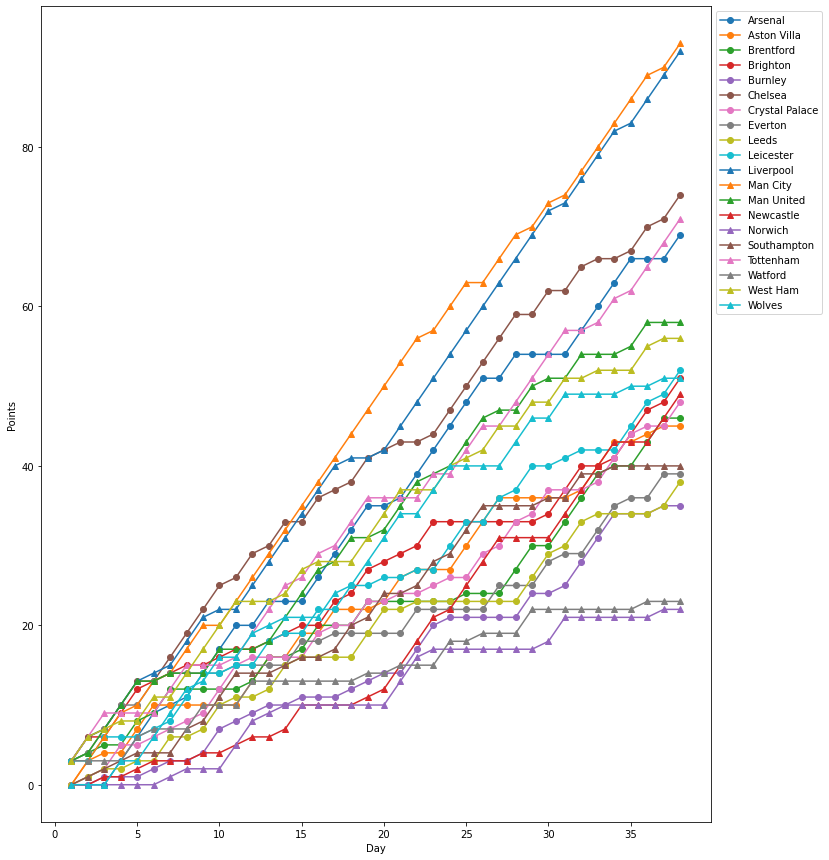

In [23]:
plt.figure(figsize=(12,15))
for j in range(0,10):
    
    
    plt.plot([i for i in range(1,39)],team_cum_pts_table.iloc[j,:].values[1:],'o-', label = team_cum_pts_table.loc[j].values[0] );
    plt.legend(loc= "upper left", bbox_to_anchor=(1,1))
    plt.xlabel('Day')
    plt.ylabel('Points')
    
for j in range(10,20):
    
    
    plt.plot([i for i in range(1,39)],team_cum_pts_table.iloc[j,:].values[1:],'^-', label = team_cum_pts_table.loc[j].values[0] );
    plt.legend(loc= "upper left", bbox_to_anchor=(1,1))
    

What is clear on the graph above is the gap between ManCity and Liverpool with the rest of the league. It seems like during the 2nd part of the season, they played in their own league. The gap with the rest of the league got bigger after each game.

Let's focus on what makes these 2 teams so much better than the rest.

## City and Liverpool's domination

In [24]:
ordered_pts = list(team_cum_pts_table[38].sort_values(ascending=False))

In [25]:
gaps = []

for i in range(len(ordered_pts)- 1):
    gap = ordered_pts[0] - ordered_pts[i+1]
    gaps.append(gap)

In [26]:
gaps

[1, 19, 22, 24, 35, 37, 41, 42, 42, 44, 45, 47, 48, 53, 54, 55, 58, 70, 71]

In [27]:
ranked_teams = list(team_cum_pts_table[['Team',38]].sort_values(by=38, ascending=False)['Team'])

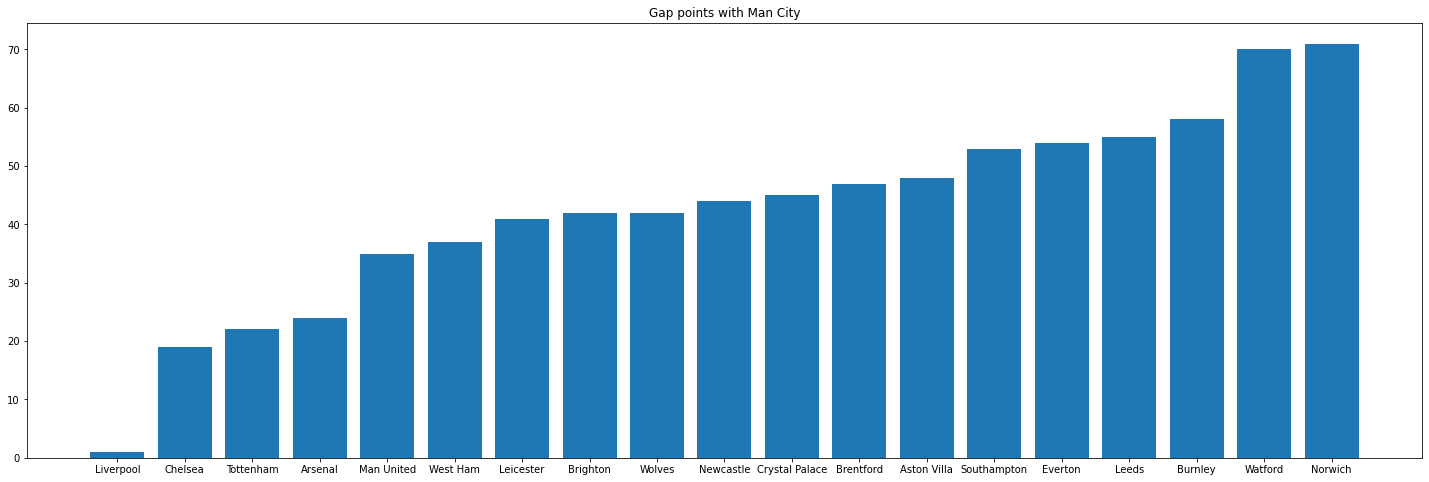

In [28]:
plt.figure(figsize=(25,8))
plt.bar(x =ranked_teams[1:] ,height=gaps)
plt.title('Gap points with Man City');

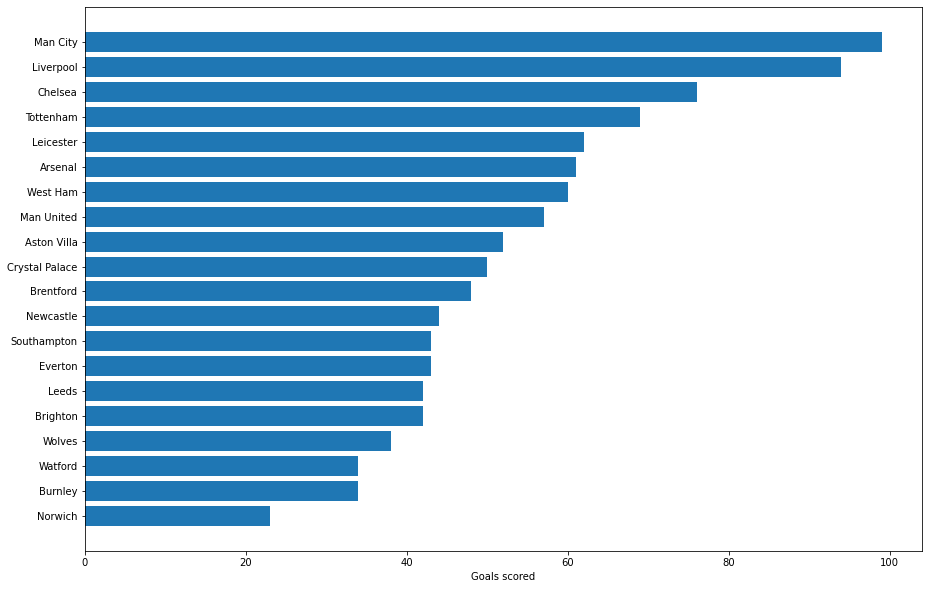

In [29]:
plt.figure(figsize=(15,10))
plt.barh(y = team_stats[['Team','Goals_Scored']].sort_values(by='Goals_Scored', ascending=True)['Team'],
        width=team_stats[['Team','Goals_Scored']].sort_values(by='Goals_Scored', ascending=True)['Goals_Scored'])
plt.xlabel('Goals scored');

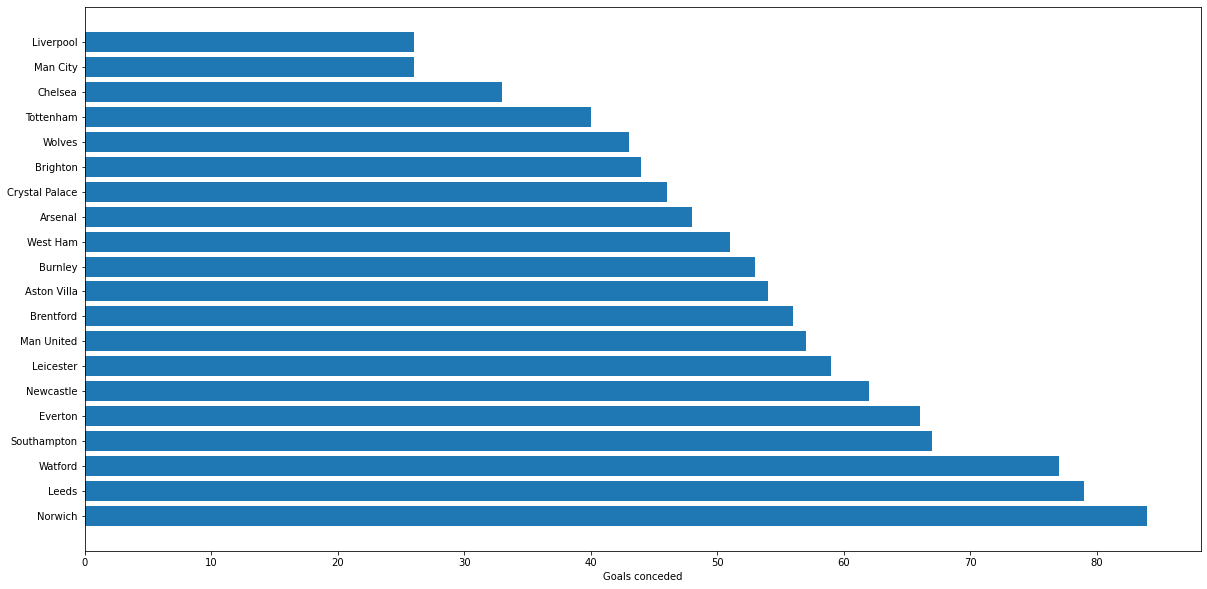

In [30]:
plt.figure(figsize=(20,10))
plt.barh(y = team_stats[['Team','Goals_Conceded']].sort_values(by='Goals_Conceded', ascending=False)['Team'],
        width=team_stats[['Team','Goals_Conceded']].sort_values(by='Goals_Conceded', ascending=False)['Goals_Conceded'])
plt.xlabel('Goals conceded');

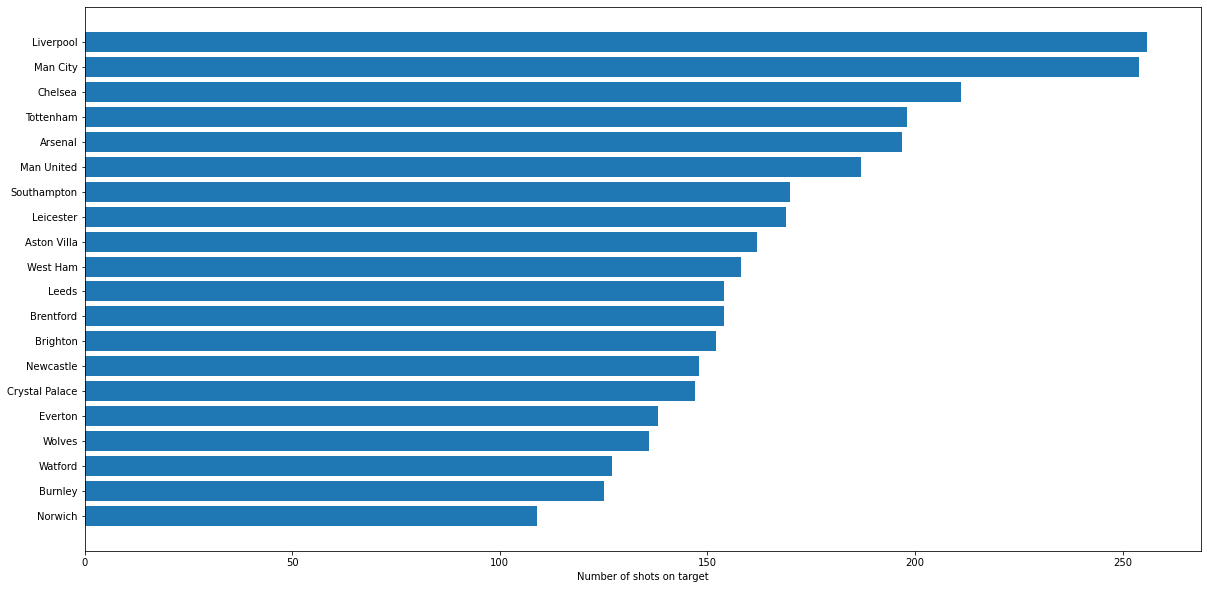

In [31]:
plt.figure(figsize=(20,10))
plt.barh(y = team_stats[['Team','Shots_on_target']].sort_values(by='Shots_on_target', ascending=True)['Team'],
        width=team_stats[['Team','Shots_on_target']].sort_values(by='Shots_on_target', ascending=True)['Shots_on_target'])
plt.xlabel('Number of shots on target');

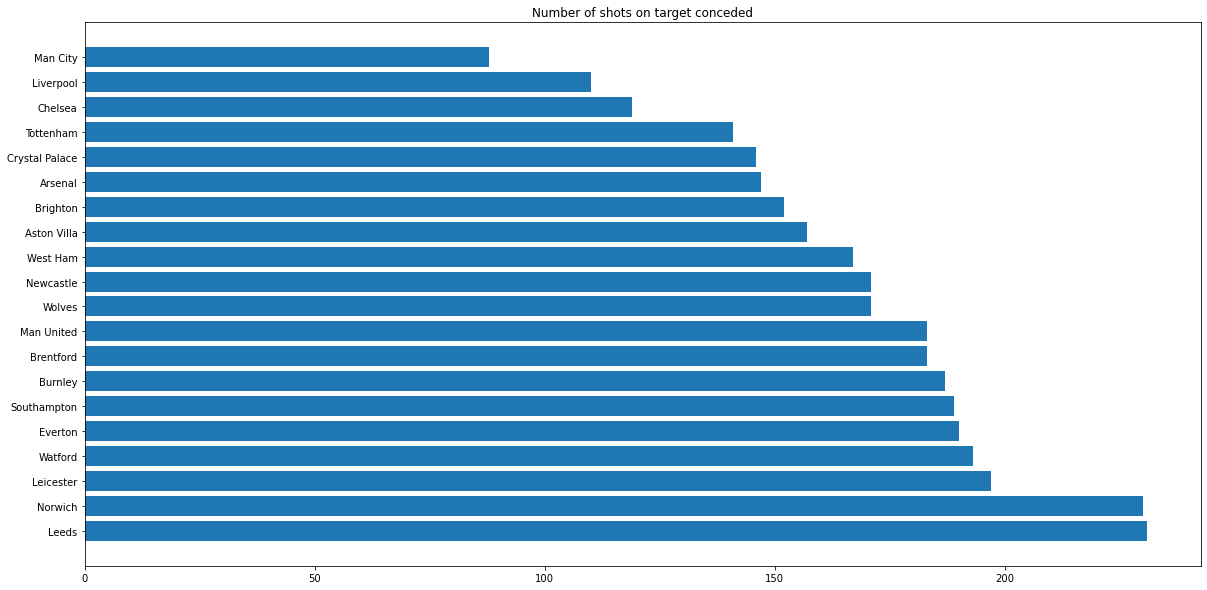

In [32]:
plt.figure(figsize=(20,10))
plt.barh(y = team_stats[['Team','ST_Conceded']].sort_values(by='ST_Conceded', ascending=False)['Team'],
        width=team_stats[['Team','ST_Conceded']].sort_values(by='ST_Conceded', ascending=False)['ST_Conceded'])
plt.title('Number of shots on target conceded');

Liverpool and ManCity dominated the season in every statistical metric. Whether offensively or defensively, they have been above the league. They scored much more, they defensed much better, they have been more precise on their shots and they allowed less big opportunities for their opponents. 

## Lead at Half Time ?

Another aspect that I would like to focus on is the 2nd half. In fact, a lot of games are won in the 2nd half because coaches can adjust their teams. The players are also more tired, which lead to more mistakes. 

In [33]:
ht_ft_score = df[['HomeTeam','AwayTeam','FTHG','FTAG','HTHG','HTAG','FTR']]

In [34]:
ht_ft_score['HTR'] = np.where(ht_ft_score['HTHG'] > ht_ft_score['HTAG'],'H', np.where(ht_ft_score['HTHG'] < ht_ft_score['HTAG'],'A','D'))

/tmp/ipykernel_265/2409818223.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ht_ft_score['HTR'] = np.where(ht_ft_score['HTHG'] > ht_ft_score['HTAG'],'H', np.where(ht_ft_score['HTHG'] < ht_ft_score['HTAG'],'A','D'))


In [35]:
ht_ft_score

,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,FTR,HTR
0,Brentford,Arsenal,2,0,1,0,H,H
1,Man United,Leeds,5,1,1,0,H,H
2,Burnley,Brighton,1,2,1,0,A,H
3,Chelsea,Crystal Palace,3,0,2,0,H,H
4,Everton,Southampton,3,1,0,1,H,A
...,...,...,...,...,...,...,...,...
375,Crystal Palace,Man United,1,0,1,0,H,H
376,Leicester,Southampton,4,1,0,0,H,D
377,Liverpool,Wolves,3,1,1,1,H,D
378,Man City,Aston Villa,3,2,0,1,H,A


In [36]:
ht_ft_score[ht_ft_score['FTR'] == ht_ft_score['HTR']]

,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,FTR,HTR
0,Brentford,Arsenal,2,0,1,0,H,H
1,Man United,Leeds,5,1,1,0,H,H
3,Chelsea,Crystal Palace,3,0,2,0,H,H
5,Leicester,Wolves,1,0,1,0,H,H
6,Watford,Aston Villa,3,2,2,0,H,H
...,...,...,...,...,...,...,...,...
370,Arsenal,Everton,5,1,2,1,H,H
373,Burnley,Newcastle,1,2,0,1,A,A
374,Chelsea,Watford,2,1,1,0,H,H
375,Crystal Palace,Man United,1,0,1,0,H,H


For 59% of the games, the leading team at Half Time won the game. Though, we still have 41% of the game that were decided during the second half. 

In [38]:
ht_ft_score[ht_ft_score['HTR'] != ht_ft_score['FTR']]

,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,FTR,HTR
2,Burnley,Brighton,1,2,1,0,A,H
4,Everton,Southampton,3,1,0,1,H,A
8,Newcastle,West Ham,2,4,2,1,A,H
9,Tottenham,Man City,1,0,0,0,H,D
16,Southampton,Man United,1,1,1,0,D,H
...,...,...,...,...,...,...,...,...
371,Brentford,Leeds,1,2,0,0,A,D
372,Brighton,West Ham,3,1,0,1,H,A
376,Leicester,Southampton,4,1,0,0,H,D
377,Liverpool,Wolves,3,1,1,1,H,D


In [155]:
changing_score = ht_ft_score[((ht_ft_score['HTR'] == 'H') & (ht_ft_score['FTR'] == 'A')) | 
            ((ht_ft_score['HTR'] == 'A') & (ht_ft_score['FTR'] == 'H')) |
           ((ht_ft_score['HTR'] == 'D') & (ht_ft_score['FTR'] == 'H')) |
           ((ht_ft_score['HTR'] == 'D') & (ht_ft_score['FTR'] == 'A')) |
            ((ht_ft_score['HTR'] == 'H') & (ht_ft_score['FTR'] == 'D')) |
            ((ht_ft_score['HTR'] == 'A') & (ht_ft_score['FTR'] == 'D'))]  

#changing_score = ht_ft_score[ht_ft_score['HTR'] != ht_ft_score['FTR']]
# Here, we created a dataset that lists all the games with the Half time scored and the Full time score different. 

In [156]:
changing_score

,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,FTR,HTR
2,Burnley,Brighton,1,2,1,0,A,H
4,Everton,Southampton,3,1,0,1,H,A
8,Newcastle,West Ham,2,4,2,1,A,H
9,Tottenham,Man City,1,0,0,0,H,D
16,Southampton,Man United,1,1,1,0,D,H
...,...,...,...,...,...,...,...,...
371,Brentford,Leeds,1,2,0,0,A,D
372,Brighton,West Ham,3,1,0,1,H,A
376,Leicester,Southampton,4,1,0,0,H,D
377,Liverpool,Wolves,3,1,1,1,H,D


Now, we are going to determine which team has won the most points the 2nd half, depending on if they played at home or away. The points won during the 2nd Half depends on the score at HT.

- If a team was leading at HT and lost at the end, they lost 3pts and the opponent won 3pts.
- If a team was leading at HT and draw at the end, they lost 2pts and the opponent won 1pt.

We will make the case for every scenario possible as long as the HT and FT results are different.

In [157]:
changing_score['Pts_Taken_2ndH_Home'] = np.where((changing_score['HTR'] == 'H') & (changing_score['FTR'] == 'A'),-3,
                                        np.where((changing_score['HTR'] == 'H') & (changing_score['FTR'] =='D'),-2,
                                        np.where((changing_score['HTR'] == 'D') & (changing_score['FTR'] == 'H'),2,
                                        np.where((changing_score['HTR'] == 'D') & (changing_score['FTR'] == 'A'),-1,
                                        np.where((changing_score['HTR'] == 'A') & (changing_score['FTR'] == 'D'),1,3)))))


changing_score['Pts_Taken_2ndH_Away'] = np.where((changing_score['HTR'] == 'H') & (changing_score['FTR'] == 'A'),3,
                                        np.where((changing_score['HTR'] == 'H') & (changing_score['FTR'] =='D'),1,
                                        np.where((changing_score['HTR'] == 'D') & (changing_score['FTR'] == 'H'),-1,
                                        np.where((changing_score['HTR'] == 'D') & (changing_score['FTR'] == 'A'),2,
                                        np.where((changing_score['HTR'] == 'A') & (changing_score['FTR'] == 'D'),-2,-3)))))

/tmp/ipykernel_74/1954664076.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  changing_score['Pts_Taken_2ndH_Home'] = np.where((changing_score['HTR'] == 'H') & (changing_score['FTR'] == 'A'),-3,
/tmp/ipykernel_74/1954664076.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  changing_score['Pts_Taken_2ndH_Away'] = np.where((changing_score['HTR'] == 'H') & (changing_score['FTR'] == 'A'),3,


In [158]:
changing_score

,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,FTR,HTR,Pts_Taken_2ndH_Home,Pts_Taken_2ndH_Away
2,Burnley,Brighton,1,2,1,0,A,H,-3,3
4,Everton,Southampton,3,1,0,1,H,A,3,-3
8,Newcastle,West Ham,2,4,2,1,A,H,-3,3
9,Tottenham,Man City,1,0,0,0,H,D,2,-1
16,Southampton,Man United,1,1,1,0,D,H,-2,1
...,...,...,...,...,...,...,...,...,...,...
371,Brentford,Leeds,1,2,0,0,A,D,-1,2
372,Brighton,West Ham,3,1,0,1,H,A,3,-3
376,Leicester,Southampton,4,1,0,0,H,D,2,-1
377,Liverpool,Wolves,3,1,1,1,H,D,2,-1


In [159]:
pts_won_2nd_H = changing_score.groupby('HomeTeam')['Pts_Taken_2ndH_Home'].sum()
pts_won_2nd_A = changing_score.groupby('AwayTeam')['Pts_Taken_2ndH_Away'].sum()

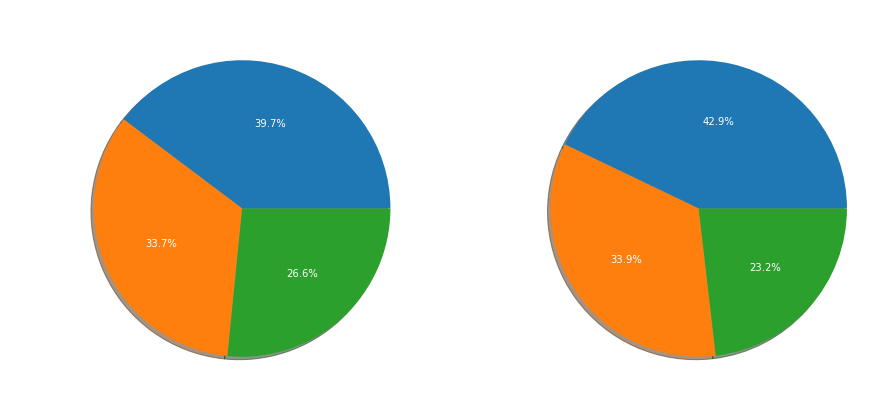

In [160]:
plt.figure(figsize=(15,15))



plt.subplot(2,2,1)
plt.pie(df['HTR'].value_counts(normalize=True).values, labels=['Draw','Home Team Lead', 'Away Team Lead'], autopct='%1.1f%%',
        shadow=True, textprops={'color':'w'})
plt.title(label='Half Time Results', color='white')

plt.subplot(2,2,2)
plt.pie(df['FTR'].value_counts(normalize=True).values, labels=['Home Team Wins','Away Team Wins', 'Draw'], autopct='%1.1f%%',
        shadow=True, textprops={'color':'w'})
plt.title(label='Full Time Results', color='white')

plt.show()

Like we said, games are generally won during the 2nd half because in most games of the 2021-22 season, the games were tied at HT. At the end, in most case, the Home Team won. 

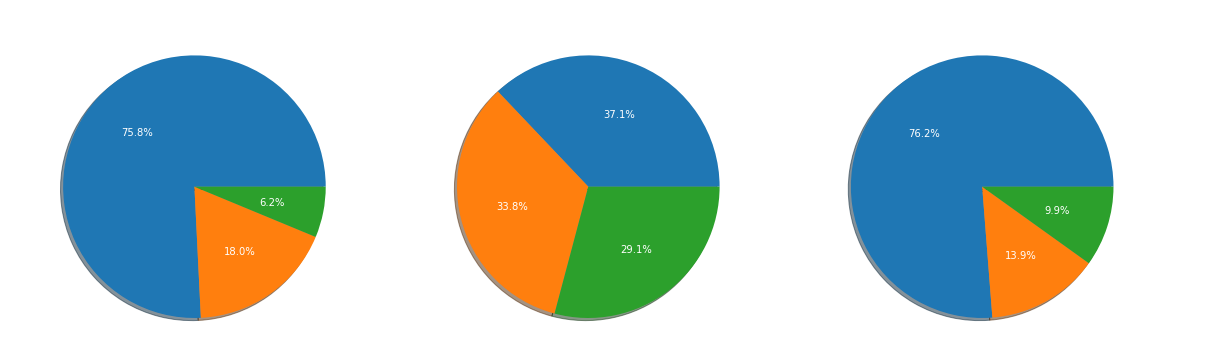

In [161]:
plt.figure(figsize=(20,10))
plt.subplot(131)
plt.pie(df.loc[df['HTR'] == 'H']['FTR'].value_counts(normalize=True), labels=['HomeTeam Wins', 'Draw', 'AwayTeam Wins'],
        autopct='%1.1f%%',
        shadow=True, textprops={'color':'w'})
plt.title(label='FT Result when HomeTeam leads at HT', color='white')

plt.subplot(132)
plt.pie(df.loc[df['HTR'] == 'D']['FTR'].value_counts(normalize=True), labels=['HomeTeam Wins', 'Draw', 'AwayTeam Wins'],
        autopct='%1.1f%%',
        shadow=True, textprops={'color':'w'})
plt.title(label='FT Result when draw at HT', color='white')

plt.subplot(133)
plt.pie(df.loc[df['HTR'] == 'A']['FTR'].value_counts(normalize=True), labels=['AwayTeam Wins', 'Draw', 'HomeTeam Wins'],
        autopct='%1.1f%%',
        shadow=True, textprops={'color':'w'})
plt.title(label='FT Result when AwayTeam leads at HT', color='white')

plt.show()


These 3 pies show that in most case, when a team leads at HT, whether at home or away, they win the game. When the game is tied at HT, usually the home team wins. 

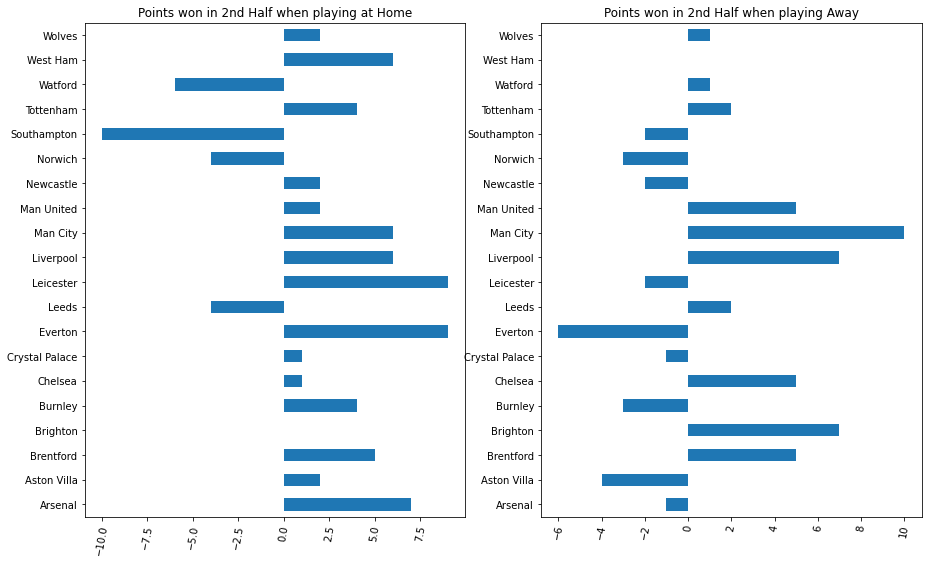

In [162]:
plt.figure(figsize=(15,20))

plt.subplot(221)
pts_won_2nd_H.plot(kind='barh',)
plt.ylabel('')
plt.xticks(rotation=80)
plt.title('Points won in 2nd Half when playing at Home')

plt.subplot(222)
pts_won_2nd_A.plot(kind='barh')
plt.ylabel('')
plt.xticks(rotation=80)
plt.title('Points won in 2nd Half when playing Away')




plt.show()


Text(0.5, 1.0, 'Points won in 2nd Half')

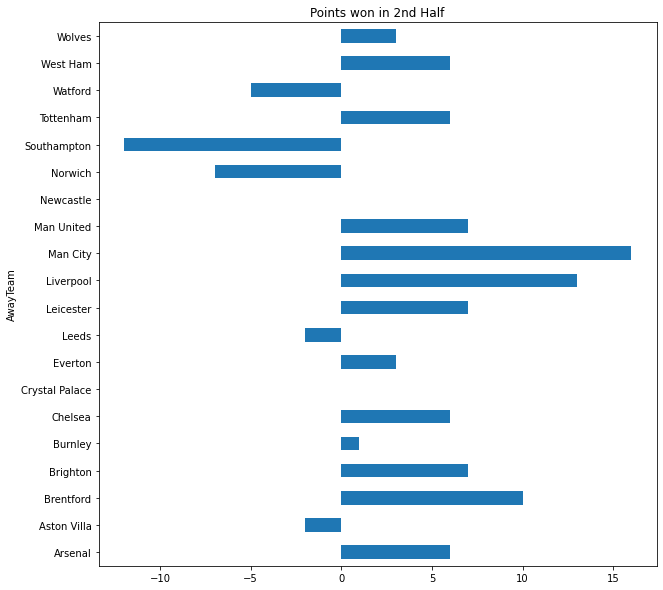

In [163]:
(pts_won_2nd_A + pts_won_2nd_H).plot(kind='barh', figsize=(10,10))
plt.xlabel('')
plt.title('Points won in 2nd Half')

A couple of points can be made from these graphs:

-  Liverpool and ManCity are the 2 teams that took the most points in the 2nd half after drawing or losing at HT. This show their superiority in several aspects of the game such as resilience and mental strenght. They also have deeper teams and their coach can make impactful substitutions. 

- Arsenal might have missed the 4th place because of their performances away. While they have been able to win many points in the 2nd half at home, they gave up points when playing away after leading or drawing at HT.

- Southampton almost got relegated and this is probably because they were a very bad 2nd half team. They managed to lose more than 10 pts after leading or drawing at HT. 